In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from seaborn import tsplot
import statsmodels
from statsmodels.tsa.stattools import acf,pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.graphics.gofplots import qqplot
from scipy.stats import probplot

from statsmodels.tsa.arima_model import ARIMA

In [2]:
#data = pd.read_csv('stock/AAPL.csv', index_col = 0)
#data = pd.read_csv('stock/DWDP.csv', index_col = 0)
#data = pd.read_csv('stock/GS.csv', index_col = 0)
data = pd.read_csv('stock/HD.csv', index_col = 0)
#data = pd.read_csv('stock/JNJ.csv', index_col = 0)
#data = pd.read_csv('stock/WMT.csv', index_col = 0)




data['log_return'] = 0
dates = data.index
for i,date in enumerate(dates[1:]):
    close = data.loc[date, 'close']
    prev_close = data.loc[dates[i],'close']
    data.loc[date, 'log_return'] = 100*np.log(close/prev_close)
    
    
    
y_t=data['log_return'].tolist()#log return
#proxy = [pow((y_t[i] - sum(y_t)/len(y_t)),2) for i in range(len(y_t))]#volitility of log return
proxy = np.log([pow((y_t[i] - sum(y_t)/len(y_t)),2) for i in range(len(y_t))])



train_size = int(len(y_t)*0.8)
train_X, train_y, train_dates = y_t[:train_size], proxy[:train_size],dates[:train_size]
test_X, test_y, test_dates = y_t[train_size:], proxy[train_size:], dates[train_size:]




In [3]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
def eva(a,b):
    mse = mean_squared_error(a,b)
    rmse=np.sqrt(mse)
    mae = mean_absolute_error(a,b)
    return rmse,mse,mae




# ARIMA

In [4]:
from statsmodels.tsa.arima_model import ARIMA

def find_best_arimamodel(TS):
    best_aic = np.inf 
    best_order = None
    best_mdl = None
    pq_rng = range(6) 
    d_rng = range(2) 
    for i in pq_rng:
        for d in d_rng:
            for j in pq_rng:
                try:
                    tmp_mdl = ARIMA(TS, order=(i,d,j)).fit(
                        method='mle', trend='nc'
                    )
                    tmp_aic = tmp_mdl.aic
                    tmp_order=(i,d,j)
                    print('aic: {:6.2f} | order: {}'.format(tmp_aic, tmp_order))
                    if tmp_aic < best_aic:
                        best_aic = tmp_aic
                        best_order = (i, d, j)
                        best_mdl = tmp_mdl
                except: continue
    print('aic: {:6.2f} | order: {}'.format(best_aic, best_order))                    
    return best_aic, best_order, best_mdl


res_tup = find_best_arimamodel(train_X)

aic: 3164.45 | order: (0, 0, 1)
aic: 3157.86 | order: (0, 0, 2)
aic: 3159.54 | order: (0, 0, 3)
aic: 3159.00 | order: (0, 0, 4)
aic: 3160.10 | order: (0, 0, 5)
aic: 3162.06 | order: (0, 1, 1)
aic: 3164.52 | order: (1, 0, 0)
aic: 3163.35 | order: (1, 0, 1)
aic: 3159.72 | order: (1, 0, 2)
aic: 3161.72 | order: (1, 0, 5)
aic: 3621.79 | order: (1, 1, 0)
aic: 3162.94 | order: (1, 1, 2)
aic: 3157.90 | order: (1, 1, 3)
aic: 3159.24 | order: (1, 1, 4)
aic: 3159.29 | order: (1, 1, 5)
aic: 3157.30 | order: (2, 0, 0)
aic: 3158.86 | order: (2, 0, 1)
aic: 3158.16 | order: (2, 0, 2)
aic: 3456.81 | order: (2, 1, 0)
aic: 3155.32 | order: (2, 1, 1)
aic: 3157.05 | order: (2, 1, 2)
aic: 3156.76 | order: (2, 1, 3)
aic: 3158.92 | order: (2, 1, 4)
aic: 3160.71 | order: (2, 1, 5)
aic: 3158.45 | order: (3, 0, 0)
aic: 3159.98 | order: (3, 0, 1)
aic: 3160.06 | order: (3, 0, 2)
aic: 3162.03 | order: (3, 0, 3)


//anaconda3/lib/python3.7/site-packages/statsmodels/tsa/tsatools.py:668: RuntimeWarning: invalid value encountered in true_divide
  newparams = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
//anaconda3/lib/python3.7/site-packages/statsmodels/tsa/tsatools.py:669: RuntimeWarning: invalid value encountered in true_divide
  tmp = ((1-np.exp(-params))/(1+np.exp(-params))).copy()


aic: 3161.28 | order: (3, 0, 4)
aic: 3162.66 | order: (3, 0, 5)
aic: 3371.19 | order: (3, 1, 0)
aic: 3156.85 | order: (3, 1, 1)
aic: 3158.87 | order: (3, 1, 2)
aic: 3158.85 | order: (3, 1, 3)
aic: 3160.52 | order: (3, 1, 4)
aic: 3162.49 | order: (3, 1, 5)
aic: 3158.95 | order: (4, 0, 0)
aic: 3160.29 | order: (4, 0, 1)
aic: 3162.07 | order: (4, 0, 2)
aic: 3163.79 | order: (4, 0, 3)
aic: 3165.87 | order: (4, 0, 4)
aic: 3161.12 | order: (4, 0, 5)
aic: 3343.32 | order: (4, 1, 0)
aic: 3157.83 | order: (4, 1, 1)
aic: 3159.07 | order: (4, 1, 2)
aic: 3160.25 | order: (4, 1, 3)
aic: 3162.49 | order: (4, 1, 4)
aic: 3162.60 | order: (4, 1, 5)
aic: 3160.05 | order: (5, 0, 0)
aic: 3162.05 | order: (5, 0, 1)
aic: 3163.73 | order: (5, 0, 2)
aic: 3165.18 | order: (5, 0, 3)
aic: 3161.28 | order: (5, 0, 4)
aic: 3169.44 | order: (5, 0, 5)
aic: 3315.17 | order: (5, 1, 0)
aic: 3158.49 | order: (5, 1, 1)
aic: 3161.34 | order: (5, 1, 2)
aic: 3161.29 | order: (5, 1, 3)
aic: 3161.54 | order: (5, 1, 4)
aic: 316

In [23]:
#best_order=res_tup[1]
best_order=[2,0,0]
best_arima_model=ARIMA(train_X, order=(2,0,0)).fit(
                        method='mle', trend='nc'
                    )
#best_arima_model.summary()

In [24]:
#recursive forecast
#时间长！！！！
k=best_order[0]
d=best_order[1]
j=best_order[2]

#f=best_arima_model.forecast()[0]
#tempX=train_X
arima_fore=[]

for i in range(len(train_X),len(y_t)):
    #tempX.append(test_X[i-1])
    pred_arima=ARIMA(y_t[0:i], order=(k,d,j)).fit(method='mle', trend='nc')#0-841 0-1256
    f=pred_arima.forecast()[0]
    #arima_fore[i-len(train_X)]=f #0/842data-415/1257data
    arima_fore.append(f)

In [29]:
f_in=best_arima_model.predict(start=0,end=len(train_X)-1)
fin_index=np.linspace(0, len(train_X)-1, num=len(train_X))
fout_index=np.linspace(len(train_X), len(y_t)-1, num=len(test_X))


Text(0.5, 1.0, 'ARIMA estimation and prediction of log return')

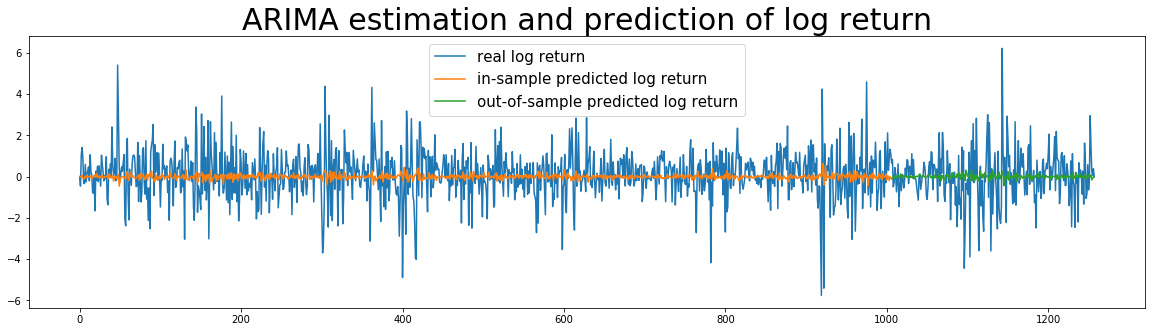

In [30]:
plt.figure(figsize = (20,5))

plt.plot(y_t,label='real log return')
plt.plot(fin_index,f_in,label='in-sample predicted log return')
plt.plot(fout_index,arima_fore,label='out-of-sample predicted log return')

plt.legend(loc='best', fontsize=15)
plt.title('ARIMA estimation and prediction of log return',fontsize=30)

(0, 20)

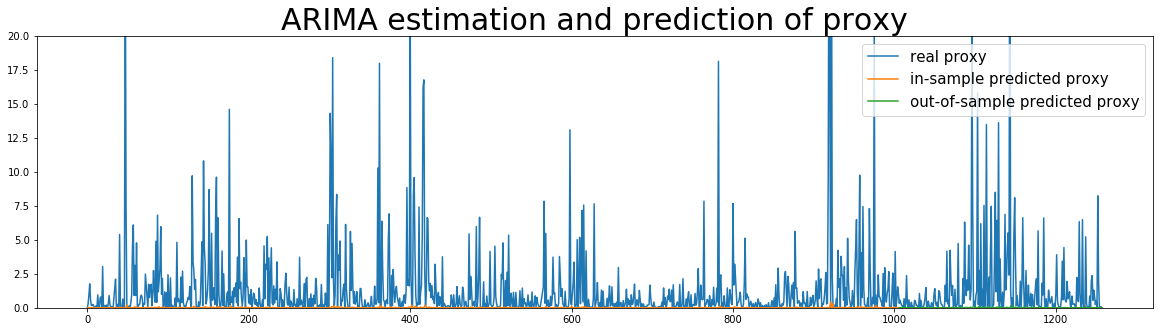

In [31]:
plt.figure(figsize = (20,5))

s=y_t
proxy_true=[pow((s[i] - sum(s)/len(s)),2) for i in range(len(s))]
plt.plot(proxy_true,label='real proxy')

s=f_in
proxy_in=[pow((s[i] - sum(s)/len(s)),2) for i in range(len(s))]
plt.plot(fin_index,proxy_in,label='in-sample predicted proxy')

s=arima_fore
proxy_out=[pow((s[i] - sum(s)/len(s)),2) for i in range(len(s))]
plt.plot(fout_index,proxy_out,label='out-of-sample predicted proxy')
plt.legend(loc='best', fontsize=15)
plt.title('ARIMA estimation and prediction of proxy',fontsize=30)

axes = plt.gca()
#axes.set_xlim([1180,1200])
axes.set_ylim([0,20])

Text(0.5, 1.0, 'ARIMA estimation and prediction of log(proxy)')

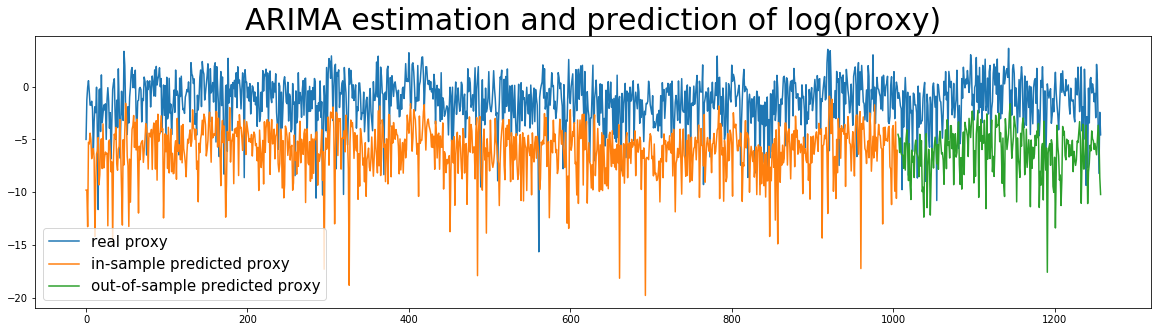

In [32]:
plt.figure(figsize = (20,5))

s=y_t
proxy_true=np.log([pow((s[i] - sum(s)/len(s)),2) for i in range(len(s))])
plt.plot(proxy_true,label='real proxy')

s=f_in
proxy_in=np.log([pow((s[i] - sum(s)/len(s)),2) for i in range(len(s))])
plt.plot(fin_index,proxy_in,label='in-sample predicted proxy')

s=arima_fore
proxy_out=np.log([pow((s[i] - sum(s)/len(s)),2) for i in range(len(s))])
plt.plot(fout_index,proxy_out,label='out-of-sample predicted proxy')
plt.legend(loc='best', fontsize=15)
plt.title('ARIMA estimation and prediction of log(proxy)',fontsize=30)

#The predicted proxy for volatility are far too small that the log of it are mostly negative as in the plot.
#ARIMA cannot 

In [34]:
s=train_X
proxy0=np.log([pow((s[i] - sum(s)/len(s)),2) for i in range(len(s))])

s=f_in
proxy00=np.log([pow((s[i] - sum(s)/len(s)),2) for i in range(len(s))])

print(eva(proxy0,proxy00))


s=test_X
proxy0=np.log([pow((s[i] - sum(s)/len(s)),2) for i in range(len(s))])

s=arima_fore
proxy00=np.log([pow((s[i] - sum(s)/len(s)),2) for i in range(len(s))])

print(eva(proxy0,proxy00))
#这个是ARIMA 预测的logreturn计算volitility 得到rmse

(5.743596315718567, 32.9888986379359, 4.982456854514885)
(5.823535524881787, 33.913566009560185, 5.119297167342744)


# ARIMA residuals log return dis

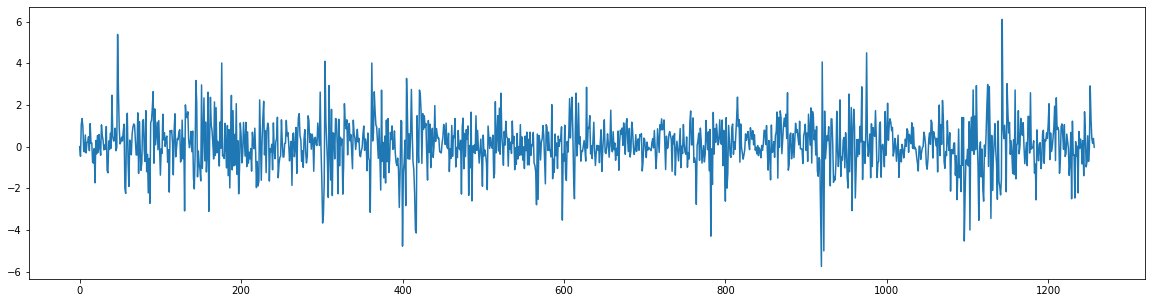

In [35]:
#test_X=np.asarray(test_X)
arima_fore=np.asarray(arima_fore)

arima_resid_out=(test_X-arima_fore).tolist()
arima_resid_in=(train_X-f_in).tolist()

arima_resid_full=(train_X-f_in).tolist()

for i in range(len(test_X)):
    arima_resid_full.append(arima_resid_out[i])
    
plt.figure(figsize = (20,5))
plt.plot(arima_resid_full)

In [36]:
from scipy.stats import kurtosis
kurtosis(arima_resid_full)
#kurtosis(y_t)
#大于3, heavy tail, StudentsT
#小于3，Normal

2.689504118668114

2.8302253926615304


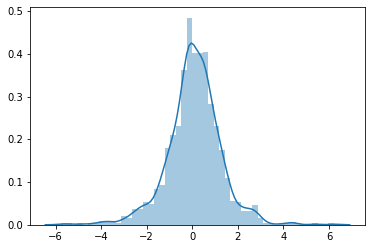

In [37]:
import seaborn as sns
import statistics
sns.distplot(y_t) 
#statistics.mean(res)
print(kurtosis(y_t))
#assume log return follows a N(miu,sigma^2)

# GARCH 

## GARCH ON log return

In [38]:
from arch import arch_model

def find_best_garchmodel(TS):
    best_aic = np.inf 
    best_order = None
    best_mdl = None
    pq_rng = range(5) 
    d = 0
    for i in pq_rng:
        for j in pq_rng:
            try:
                tmp_mdl = arch_model(TS, p=i,o=d,q=j,vol='Garch',dist='Normal').fit(disp='off')
                tmp_aic = tmp_mdl.aic
                tmp_order=(i,d,j)
                print('aic: {:6.2f} | order: {}'.format(tmp_aic, tmp_order))
                if tmp_aic < best_aic:
                    best_aic = tmp_aic                        
                    best_order = (i, d, j)
                    best_mdl = tmp_mdl
            except: continue
    print('aic: {:6.2f} | order: {}'.format(best_aic, best_order))                    
    return best_aic, best_order, best_mdl




In [39]:
garch_tup=find_best_garchmodel(train_X)
best_order_full=garch_tup[1]
best_garch_full=garch_tup[2]
#best_resgarch=arch_model(best_arima_model.resid, p=1,o=0,q=2,vol='Garch',dist='StudentsT').fit(disp='off')
#print(best_resgarch.summary())

aic: 3115.17 | order: (1, 0, 0)
aic: 3053.70 | order: (1, 0, 1)
aic: 3055.41 | order: (1, 0, 2)
aic: 3056.75 | order: (1, 0, 3)
aic: 3057.84 | order: (1, 0, 4)
aic: 3077.94 | order: (2, 0, 0)
aic: 3055.70 | order: (2, 0, 1)
aic: 3057.41 | order: (2, 0, 2)
aic: 3058.42 | order: (2, 0, 3)
aic: 3060.33 | order: (2, 0, 4)
aic: 3074.16 | order: (3, 0, 0)
aic: 3057.70 | order: (3, 0, 1)
aic: 3059.41 | order: (3, 0, 2)
aic: 3060.42 | order: (3, 0, 3)
aic: 3061.46 | order: (3, 0, 4)
aic: 3069.19 | order: (4, 0, 0)
aic: 3059.70 | order: (4, 0, 1)
aic: 3061.63 | order: (4, 0, 2)
aic: 3062.42 | order: (4, 0, 3)
aic: 3063.46 | order: (4, 0, 4)
aic: 3053.70 | order: (1, 0, 1)


In [40]:
#train_X=y_t[:train_size]

garch_var_full = np.zeros(len(test_X)) 
garch_mean_full = np.zeros(len(test_X)) 

pred_model=arch_model(y_t, p=best_order_full[0],o=best_order_full[1],
                      q=best_order_full[2],vol='Garch',dist='Normal')


for i in range(len(test_X)):
    #print(i)
    res = pred_model.fit(last_obs=len(train_X)+i, disp='off')#1257th 前面都是na #842-1257
    temp = res.forecast(horizon=1).variance #conditional sigmasq
    temp2 = res.forecast(horizon=1).mean #conditional mean
    #print(temp.iloc[-5:])
    garch_var_full[i] = temp.iloc[i + len(train_X)-1]#the first var is the last train var
    garch_mean_full[i]=temp2.iloc[-1] 
    
#garch_var_res[len(test_X)]=pred_model.fit(disp='off').forecast(horizon=1).variance.iloc[-1]
#garch_mean_res[len(test_X)]=pred_model.fit(disp='off').forecast(horizon=1).mean.iloc[-1]
vardf_full=pd.DataFrame(garch_var_full)#last train var - last test var

#print(vardf)

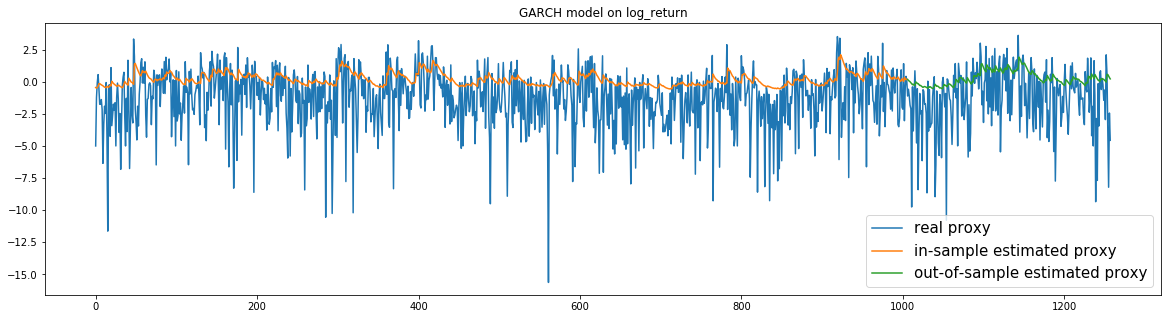

In [41]:
plt.figure(figsize = (20,5))

s=y_t
proxy0=np.log([pow((s[i] - sum(s)/len(s)),2) for i in range(len(s))])
plt.plot(proxy0,label='real proxy')#real


plt.plot(np.log(best_garch_full.conditional_volatility**2),label='in-sample estimated proxy')


fout_index=np.linspace(len(train_X), len(y_t)-1, num=len(test_X))
plt.plot(fout_index,np.log(vardf_full),label='out-of-sample estimated proxy')


plt.legend(loc='best', fontsize=15)
plt.title('GARCH model on log_return')
axes = plt.gca()
#axes.set_xlim([1180,1200])
#axes.set_ylim([0,5])

In [42]:
s=train_X
proxy0=np.log([pow((s[i] - sum(s)/len(s)),2) for i in range(len(s))])

proxy00=np.log(best_garch_full.conditional_volatility**2)
#proxy00=np.log([pow((s[i] - sum(s)/len(s)),2) for i in range(len(s))])

print(eva(proxy0,proxy00))


s=test_X
proxy0=np.log([pow((s[i] - sum(s)/len(s)),2) for i in range(len(s))])

proxy00=np.log(vardf_full)
#proxy00=np.log([pow((s[i] - sum(s)/len(s)),2) for i in range(len(s))])

print(eva(proxy0,proxy00))
#这个是ARIMA 预测的logreturn计算volitility 得到rmse

(2.70839912129036, 7.335425800206395, 1.9235070577239444)
(2.916214749406279, 8.504308464654727, 2.093011275026867)


## GARCH ON ARIMA RESIDUALS

In [43]:
garch_tup=find_best_garchmodel(arima_resid_in)
best_order_res=garch_tup[1]
best_garch_res=garch_tup[2]
#best_resgarch=arch_model(best_arima_model.resid, p=1,o=0,q=2,vol='Garch',dist='StudentsT').fit(disp='off')
#print(best_resgarch.summary())

aic: 3101.05 | order: (1, 0, 0)
aic: 3047.88 | order: (1, 0, 1)
aic: 3049.51 | order: (1, 0, 2)
aic: 3050.78 | order: (1, 0, 3)
aic: 3052.01 | order: (1, 0, 4)
aic: 3071.06 | order: (2, 0, 0)
aic: 3049.88 | order: (2, 0, 1)
aic: 3051.51 | order: (2, 0, 2)
aic: 3052.31 | order: (2, 0, 3)
aic: 3054.31 | order: (2, 0, 4)
aic: 3069.19 | order: (3, 0, 0)
aic: 3051.88 | order: (3, 0, 1)
aic: 3053.51 | order: (3, 0, 2)
aic: 3054.31 | order: (3, 0, 3)
aic: 3055.80 | order: (3, 0, 4)
aic: 3062.67 | order: (4, 0, 0)
aic: 3053.88 | order: (4, 0, 1)
aic: 3055.95 | order: (4, 0, 2)
aic: 3056.31 | order: (4, 0, 3)
aic: 3057.80 | order: (4, 0, 4)
aic: 3047.88 | order: (1, 0, 1)


In [44]:
#train_X=y_t[:train_size]

garch_var_res = np.zeros(len(test_X)) 
garch_mean_res = np.zeros(len(test_X)) 

pred_model=arch_model(arima_resid_full, p=best_order_res[0],o=best_order_res[1],
                      q=best_order_res[2],vol='Garch',dist='Normal')


for i in range(len(test_X)):
    #print(i)
    res = pred_model.fit(last_obs=len(train_X)+i, disp='off')#1257th 前面都是na #842-1257
    temp = res.forecast(horizon=1).variance #conditional sigmasq
    temp2 = res.forecast(horizon=1).mean #conditional mean
    #print(temp.iloc[-5:])
    garch_var_res[i] = temp.iloc[i + len(train_X)-1]#the first var is the last train var
    garch_mean_res[i]=temp2.iloc[-1] 
    
#garch_var_res[len(test_X)]=pred_model.fit(disp='off').forecast(horizon=1).variance.iloc[-1]
#garch_mean_res[len(test_X)]=pred_model.fit(disp='off').forecast(horizon=1).mean.iloc[-1]
vardf=pd.DataFrame(garch_var_res)#last train var - last test var

#print(vardf)

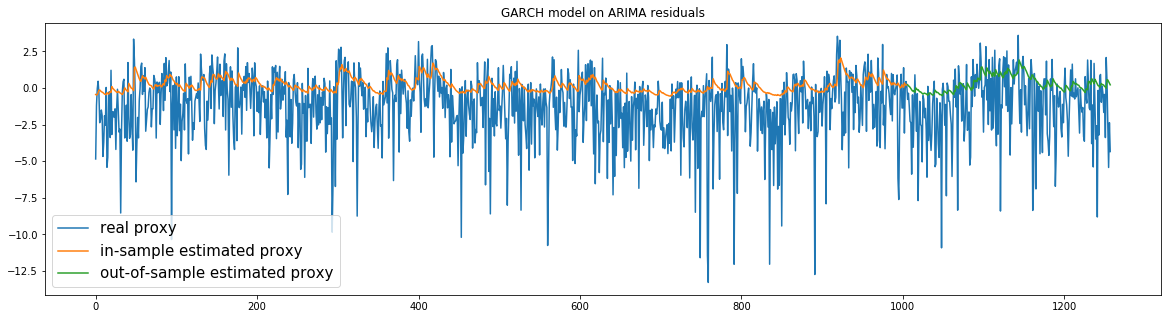

In [45]:
plt.figure(figsize = (20,5))

s=arima_resid_full
proxy0=np.log([pow((s[i] - sum(s)/len(s)),2) for i in range(len(s))])
plt.plot(proxy0,label='real proxy')#real


plt.plot(np.log(best_garch_res.conditional_volatility**2),label='in-sample estimated proxy')


fout_index=np.linspace(len(train_X), len(y_t)-1, num=len(test_X))
plt.plot(fout_index,np.log(vardf),label='out-of-sample estimated proxy')


plt.legend(loc='best', fontsize=15)
plt.title('GARCH model on ARIMA residuals')
axes = plt.gca()
#axes.set_xlim([1180,1200])
#axes.set_ylim([0,5])

In [46]:
s=arima_resid_in
proxy0=np.log([pow((s[i] - sum(s)/len(s)),2) for i in range(len(s))])

proxy00=np.log(best_garch_res.conditional_volatility**2)
#proxy00=np.log([pow((s[i] - sum(s)/len(s)),2) for i in range(len(s))])

print(eva(proxy0,proxy00))


s=arima_resid_out
proxy0=np.log([pow((s[i] - sum(s)/len(s)),2) for i in range(len(s))])

proxy00=np.log(vardf)
#proxy00=np.log([pow((s[i] - sum(s)/len(s)),2) for i in range(len(s))])

print(eva(proxy0,proxy00))
#这个是ARIMA 预测的logreturn计算volitility 得到rmse

(2.5687776345226316, 6.598618535623688, 1.8702995265461932)
(2.936690395674719, 8.624150480048137, 2.099753581588326)
